In [0]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
# !kill -9 -1

!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse|



^C
gpg: keybox '/tmp/tmplrwfq4wj/pubring.gpg' created
gpg: /tmp/tmplrwfq4wj/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [1]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

# # Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
# Work around misordering of STREAM and STDIN in Jupyter.
# https://github.com/jupyter/notebook/issues/3159
prompt = !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# prompt
vcode = getpass.getpass(prompt[0] + '\n\nEnter verification code: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force

Enter verification code: ··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [2]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p new
!google-drive-ocamlfuse new

print ('Files in Drive:')
!ls new/ #Year\ 3:\ Focus/Summer Internships/Documents

# # Create a file in Drive.
# !echo "This newly created file will appear in your Drive file list." > drive/created.txt

import numpy as np
# X = np.load("new/pred.npy")
# Y_ = np.load("new/target.npy")



Files in Drive:
000009045073-101010016272.pdf
000009045073-105010097054.pdf
101009888218.pdf
101010016272.pdf
105009454758.pdf
105009585929.pdf
105010097054.pdf
118009434025.pdf
1.2 Make-up Work.pdf
2014  Notice of assessment - My Account.pdf
3.2 Pre-class Work.odt
337 Tranquille Road, Kamloops - Financial Statement.pdf
4.1 Make up work.pdf
541590XXXXXX5646-2016Aug16-2016Sep13.pdf
541590XXXXXX5646-2016Jul14-2016Aug15.pdf
541590XXXXXX5646-2016Jun14-2016Jul13.pdf
541590XXXXXX5646-2016Nov15-2016Dec13.pdf
541590XXXXXX5646-2016Oct14-2016Nov14.pdf
541590XXXXXX5646-2016Sep14-2016Oct13.pdf
541590XXXXXX5646-2017Apr14-2017May15.pdf
541590XXXXXX5646-2017Feb14-2017Mar13.pdf
541590XXXXXX5646-2017Jul14-2017Aug14.pdf
541590XXXXXX5646-2017Jun14-2017Jul13.pdf
541590XXXXXX5646-2017Mar14-2017Apr13.pdf
541590XXXXXX5646-2017Nov15-2017Dec13.pdf
8.2 Make-up Work.pdf
Accept Financial Aid _ Minerva Schools.pdf
Alex letter.pdf
AlexNguyen_CV (22cb60ae).pdf
AlexNguyen_CV (317620a3).pdf
AlexNguyen_CV (64ba7945).pd

In [4]:
import numpy as np
!ls "new/Year 3: Focus/Summer Internships/Documents"
X = np.load("new/Year 3: Focus/Summer Internships/Documents/predictors.npy")
true_Y = np.load("new/Year 3: Focus/Summer Internships/Documents/true.npy")
pred_Y = np.load("new/Year 3: Focus/Summer Internships/Documents/pred.npy")
# Y_ = np.load("new/Year 3: Focus/Summer Internships/Documents/target.npy")

1D_Diagonalize_Recursion.ipynb
adam_relu_lr_1e3_decay1e_7_batch_10_weights-improvement-10-0.09975532387333362.hdf5
adam_relu_lr_1e3_decay1e_7_batch_10_weights-improvement-1-0.10018198614753808.hdf5
adam_relu_lr_1e3_decay1e_7_batch_10_weights-improvement-2-0.09975532390978187.hdf5
adam_relu_lr_1e3_decay1e_7_batch_10_weights-improvement-6-0.09975532390774519.hdf5
Compare_diagonalize_recursion.ipynb
diagonalize
diagonalize_3D_Hamiltonian.py
Diagonalize_Recursion.ipynb
Explore_Omit.ipynb
explore_omit.py
generate_train_data.py
greenf.py
H.py
my_model.hdf5
NN_predict_omit_error_copy2.ipynb
NN_predict_omit_error_copy.ipynb
NN_predict_omit_error_train.py
Omit_States.ipynb
predictors.npy
pred.npy
true.npy
Untitled0.ipynb
Untitled1.ipynb
Untitled.ipynb
weights_files


UnicodeError: ignored

In [8]:
pred_Y

NameError: ignored

(7973010, 1)


(array([5766955.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2206055.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

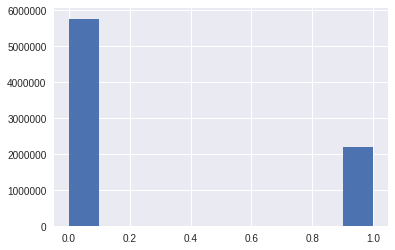

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

target = np.absolute(true_Y - pred_Y) / np.absolute(true_Y) 
print (target.shape)
Y = np.array([target < 1],dtype = int)[0]
# Y = target[target < 5]
plt.hist(Y)

In [6]:
print(Y.shape)
print(X.shape)

(7973010, 1)
(7973010, 10)


In [13]:
target

array([[ 1.04179679],
       [ 1.1592337 ],
       [ 0.86570558],
       ...,
       [ 0.29991441],
       [17.01769961],
       [ 0.62917715]])

In [0]:
Y_[Y_ < 5].shape
# X.shape

(4092619,)

(array([3.128900e+05, 1.102049e+06, 1.010582e+06, 5.326330e+05,
        3.065160e+05, 1.934020e+05, 1.299350e+05, 9.199900e+04,
        6.903200e+04, 5.259700e+04, 4.152600e+04, 3.295100e+04,
        2.688300e+04, 2.203100e+04, 1.845200e+04, 1.554500e+04,
        1.327500e+04, 1.135300e+04, 9.854000e+03, 8.768000e+03,
        7.637000e+03, 6.616000e+03, 5.926000e+03, 5.307000e+03,
        4.800000e+03, 4.222000e+03, 3.903000e+03, 3.508000e+03,
        3.198000e+03, 2.955000e+03, 2.699000e+03, 2.403000e+03,
        2.296000e+03, 1.990000e+03, 1.824000e+03, 1.786000e+03,
        1.585000e+03, 1.570000e+03, 1.350000e+03, 1.347000e+03,
        1.232000e+03, 1.110000e+03, 1.095000e+03, 1.003000e+03,
        9.680000e+02, 8.630000e+02, 8.360000e+02, 8.150000e+02,
        7.470000e+02, 7.000000e+02, 6.410000e+02, 6.330000e+02,
        6.580000e+02, 5.990000e+02, 5.460000e+02, 5.070000e+02,
        4.990000e+02, 4.770000e+02, 4.710000e+02, 4.170000e+02,
        4.280000e+02, 4.290000e+02, 3.78

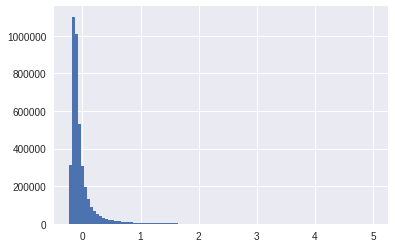

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(Y_, 100)

In [0]:

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y_, test_size=0.2, random_state=42)
# print (X_train.shape)
from keras.models import Sequential, load_model
from keras.layers import Dense, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from keras import regularizers, optimizers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from keras.callbacks import ModelCheckpoint


# seed = 7
# np.random.seed(seed)




# create model
model = Sequential()
model.add(Dense(200, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer='normal', activation='softmax'))
print(model.summary())
  
# Compile model
Adam = optimizers.Adam(lr=0.003, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer=Adam, metrics = ["accuracy"])

filepath="new/Year 3: Focus/Summer Internships/Documents/weights_files/sgd_relu_decay1e_8_weights-improvement-{epoch}-{accuracy}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]




# kfold = KFold(n_splits=2, random_state=seed)
# results = cross_val_score(estimator, X_train, y_train, cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
# print ("Results", results)
# model = load_model('new/Year 3: Focus/Summer Internships/Documents/weights-improvement-2-1.0170094634986524.hdf5')
# model.fit(X[:400], Y[:400], validation_split=0.2, epochs=50, batch_size=50, callbacks=callbacks_list, verbose=1)
model.fit(X[:100], Y[:100], validation_split=0.2, epochs=1, batch_size=500, verbose=1)
scores = model.evaluate(X[:100], Y[:100])
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# model.save('new/Year 3: Focus/Summer Internships/Documents/weights_files/my_model.hdf5')

# from google.colab import files
# files.download( 'new/my_model.h5' ) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 200)               2200      
_________________________________________________________________
dense_54 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_55 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_56 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_57 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_58 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_59 (Dense)             (None, 200)               40200     
__________

In [0]:
model.predict(X[:100])

array([[13861420.],
       [12813268.],
       [10111488.],
       [14553907.],
       [13135963.],
       [13651968.],
       [13535556.],
       [11536029.],
       [11647715.],
       [11496642.],
       [ 8599003.],
       [13644089.],
       [15407268.],
       [11927734.],
       [ 9376211.],
       [ 9087153.],
       [ 9535354.],
       [11896094.],
       [ 9960331.],
       [15759240.],
       [10071588.],
       [ 9884216.],
       [15857197.],
       [11848839.],
       [12015984.],
       [ 9338110.],
       [11115431.],
       [13434867.],
       [15390464.],
       [10153054.],
       [11349771.],
       [ 8727338.],
       [13958261.],
       [ 9548144.],
       [ 9983405.],
       [16524906.],
       [15087780.],
       [12228011.],
       [ 8559956.],
       [ 9740068.],
       [13122110.],
       [10424630.],
       [11380286.],
       [11083133.],
       [13291512.],
       [12388278.],
       [10754402.],
       [11981844.],
       [12295723.],
       [11438919.],


In [8]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential, load_model
from keras.layers import Dense, BatchNormalization, Activation
from keras import regularizers, optimizers
from sklearn import pipeline

from keras.callbacks import ModelCheckpoint, EarlyStopping

def create_baseline():
    model = Sequential()
    model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    for _ in range(30):
        model.add(Dense(10, kernel_initializer='normal', activation='relu'))
        model.add(BatchNormalization())
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
#     print(model.summary())

    Adam = optimizers.Adam(lr=0.01, decay=1e-12)
    model.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['acc'])
    return model
filepath="new/Year 3: Focus/Summer Internships/Documents/weights_files/sgd_relu_decay1e_8_weights-improvement-{epoch}-{acc}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=0, mode='auto')
callbacks_list = [early_stopping]

estimator = KerasClassifier(build_fn=create_baseline)
estimator.fit(X[:200000], Y[:200000], verbose = 1, epochs = 10, batch_size=100, validation_split=0.2, callbacks=callbacks_list)


# kfold = StratifiedKFold(n_splits=1, shuffle=True)

# model.fit(X[:100], Y[:100], validation_split=0.2, epochs=1000, batch_size=50, verbose=1)
# results = cross_val_score(estimator, X, Y)
# print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Train on 80000 samples, validate on 20000 samples
Epoch 1/1
69000/80000 [========================>.....] - ETA: 16s - loss: 0.5930 - acc: 0.7215

80000/80000 [==============================] - 121s 2ms/step - loss: 0.5935 - acc: 0.7209 - val_loss: 0.5864 - val_acc: 0.7269


(7973010, 1)


(array([ 51847.,  24153.,  26745.,  32795.,  40179.,  47597.,  56931.,
         65910.,  75493.,  86484.,  97420., 110145., 123268., 138004.,
        154468., 171919., 192327., 214692., 236840., 258823., 264852.,
        253592., 238552., 225244., 211449., 198831., 186713., 175037.,
        164672., 156265., 146553., 138811., 130130., 122711., 116200.,
        110141., 103236.,  98351.,  93241.,  87744.,  83779.,  78889.,
         75479.,  71532.,  68119.,  64796.,  61902.,  59517.,  56474.,
         53487.,  51543.,  49242.,  46903.,  45228.,  43147.,  41606.,
         39823.,  38050.,  36624.,  35098.,  33641.,  32541.,  31604.,
         30379.,  29515.,  28015.,  27256.,  26256.,  25509.,  24427.,
         23773.,  22895.,  22235.,  21481.,  20652.,  20070.,  19657.,
         18900.,  18433.,  17821.,  17584.,  16918.,  16485.,  15859.,
         15561.,  15104.,  14684.,  14075.,  13757.,  13721.,  12991.,
         12764.,  12512.,  12217.,  11858.,  11555.,  11293.,  11103.,
      

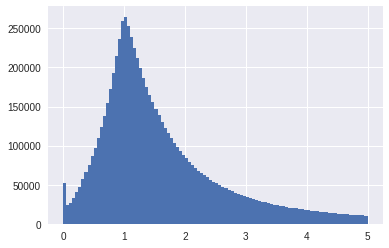

In [6]:
target = np.absolute(true_Y - pred_Y) / np.absolute(true_Y) 
print (target.shape)
Y = np.array([target < 1],dtype = int)[0]

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(target[target < 5], 100)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X[:300000], Y[:300000], test_size=0.5)
print (X_train.shape)
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn.fit(X_train, y_train) 
predictions = knn.predict(X_test)
print(classification_report(predictions, y_test))
print(accuracy_score(predictions, y_test))

(150000, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


             precision    recall  f1-score   support

          0       0.95      0.73      0.82    142342
          1       0.05      0.28      0.09      7658

avg / total       0.90      0.70      0.79    150000

0.7035


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(X[:1000000], Y[:1000000], test_size=0.5)
print (X_train.shape)
rf.fit(X_train, y_train) 
predictions = rf.predict(X_test)
np.save("new/Year 3: Focus/Summer Internships/Documents/predictions_randomforest.npy", predictions)
print(rf.feature_importances_)
print(classification_report(predictions, y_test))
print(accuracy_score(predictions, y_test))

(500000, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
